#Import Library

In [244]:
#Preprocessing Libraries
import pandas as pd # Library untuk membaca, menulis, dan memanipulasi data tabular
import numpy as np # Library untuk komputasi numerik dan manipulasi array multidimensi

#Plotting
import matplotlib.pyplot as plt # Library untuk membuat visualisasi seperti plot grafik

# Library dari sklearn
from sklearn.model_selection import train_test_split # Untuk membagi dataset menjadi subset pelatihan dan pengujian
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Untuk mengevaluasi performa model

import seaborn as sns

import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Nadam, Adam
from tensorflow.keras.optimizers import AdamW

from tensorflow.keras.callbacks import EarlyStopping

import plotly.express as px


#Memanggil Datasets

In [245]:
# Membaca file CSV dan mengonversinya menjadi sebuah DataFrame
dataset = pd.read_csv('Rainfall.csv')
dataset.head() #Menampilkan lima baris pertama dari DataFrame

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87,88,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95,91,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75,47,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95,95,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52,45,3.6,40.0,24.8,0


#Data Understanding

In [246]:
#Jumlah data, Jumlah kolom
dataset.shape

(2190, 12)

In [247]:
# Memberikan informasi ringkas tentang dataset, termasuk jumlah baris dan kolom,
# serta tipe data dan jumlah nilai non-null untuk setiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   int64  
 7   cloud          2190 non-null   int64  
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 205.4 KB


In [248]:
# Memberikan informasi untuk mengetahui nama-nama kolom yang ada dalam dataset
dataset.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

In [249]:
# ringkasan statistik deskriptif untuk kolom-kolom numerik dalam dataset,
# seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum
dataset.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [250]:
dataset.dtypes # Memeriksa tipe data yang dimiliki oleh setiap kolom

,0
day,int64
pressure,float64
maxtemp,float64
temparature,float64
mintemp,float64
dewpoint,float64
humidity,int64
cloud,int64
sunshine,float64
winddirection,float64


In [251]:
dataset.isnull()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,False,False,False,False,False,False,False,False,False,False,False,False
2186,False,False,False,False,False,False,False,False,False,False,False,False
2187,False,False,False,False,False,False,False,False,False,False,False,False
2188,False,False,False,False,False,False,False,False,False,False,False,False


##Visualisasi Data

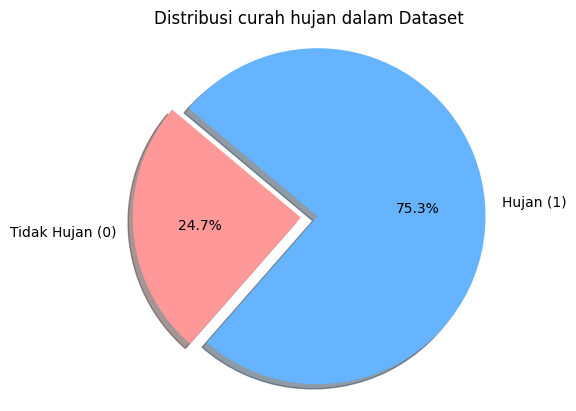

In [252]:
# Hitung frekuensi
counts = dataset['rainfall'].value_counts().sort_index()

# Label sesuai urutan
labels = ['Tidak Hujan (0)', 'Hujan (1)']
sizes = [counts.get(0, 0), counts.get(1, 0)]  # sesuai urutan label
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
plt.title("Distribusi curah hujan dalam Dataset")
plt.show()

#Data Preparation

##Memeriksa data duplikat

In [253]:
# Memeriksa jumlah data yang duplikat/memiliki kesamaan
dataset.duplicated().sum()

np.int64(0)

##Menghapus data kosong

In [254]:
# Memeriksa jumlah data yang bernilai kosong
dataset.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0
winddirection,0


In [255]:
dataset.dropna(inplace=True)

In [256]:
dataset.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0
winddirection,0


In [257]:
#Jumlah data, Jumlah kolom
dataset.shape

(2190, 12)

##Data split

In [258]:
def split_data(test_size, x, y, num_class):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    return X_train, X_test, Y_train, Y_test

test_size = 0.20
# Pilih hanya kolom-kolom yang diinginkan
selected_columns = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
                    'dewpoint', 'humidity', 'cloud', 'sunshine',
                    'winddirection', 'windspeed']

dataset_selected = dataset[selected_columns]

# Sekarang dataset_selected berisi hanya kolom yang diinginkan
X_train, X_test, y_train, y_test = split_data(test_size, dataset_selected, dataset['rainfall'], 2)

train_size_percentage = 100 - (test_size * 100)
test_size_percentage = test_size * 100

train_size = len(X_train)
test_size = len(X_test)

# Membuat pie chart interaktif dengan plotly
sizes = [train_size, test_size]
labels = ['Data Latih', 'Data Uji']

fig = px.pie(values=sizes, names=labels, title='Proporsi Data Latih dan Data Uji',
             hover_data={'values': sizes}, labels={'values':'Jumlah'})

fig.update_traces(textinfo='percent+label', hovertemplate='Jumlah: %{value}<br>Persentase: %{percent}')

# Menambahkan informasi tambahan di bawah grafik
fig.add_annotation(
    x=0.5, y=-0.1,
    text=f"Data Latih ({train_size_percentage}%) sebanyak {train_size} data, dan data uji ({test_size_percentage}%) sebanyak {test_size} data",
    showarrow=False,
    xref="paper", yref="paper",
    font=dict(size=12),
    align="center"
)

fig.show()

#Modelling

In [259]:
# Optimizer function
def optimizer():
    sgd = SGD(learning_rate=0.005, momentum=0.5, nesterov=True)
    rms = RMSprop()
    nadam = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
    adam = Adam()
    adamW = AdamW(learning_rate=0.002, weight_decay=0.001, beta_1=0.9, beta_2=0.999)
    return sgd, rms, nadam, adamW, adam

# Model initialization
def init_ann(num_classes, input_dim):
    sgd, rms, nadam, adamW, adam = optimizer()
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(num_classes, kernel_initializer='he_uniform', activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [260]:
# Inisialisasi dan latih model
model_1 = init_ann(num_classes=1, input_dim=X_train.shape[1])
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265 (1.04 KB)

 Trainable params: 265 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6837 - loss: 0.6219 - val_accuracy: 0.8082 - val_loss: 0.5191
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7679 - loss: 0.5284 - val_accuracy: 0.8288 - val_loss: 0.4592
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8345 - loss: 0.4358 - val_accuracy: 0.8311 - val_loss: 0.4269
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8279 - loss: 0.4025 - val_accuracy: 0.8333 - val_loss: 0.4128
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 0.3814 - val_accuracy: 0.8379 - val_loss: 0.4087
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.3662 - val_accuracy: 0.8379 - val_loss: 0.4075
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8481 - loss: 0.3540 - val_accuracy: 0.8356 - val_loss: 0.4059
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8611 - loss: 0.3325 - val_accuracy: 0.8402 - val_loss:

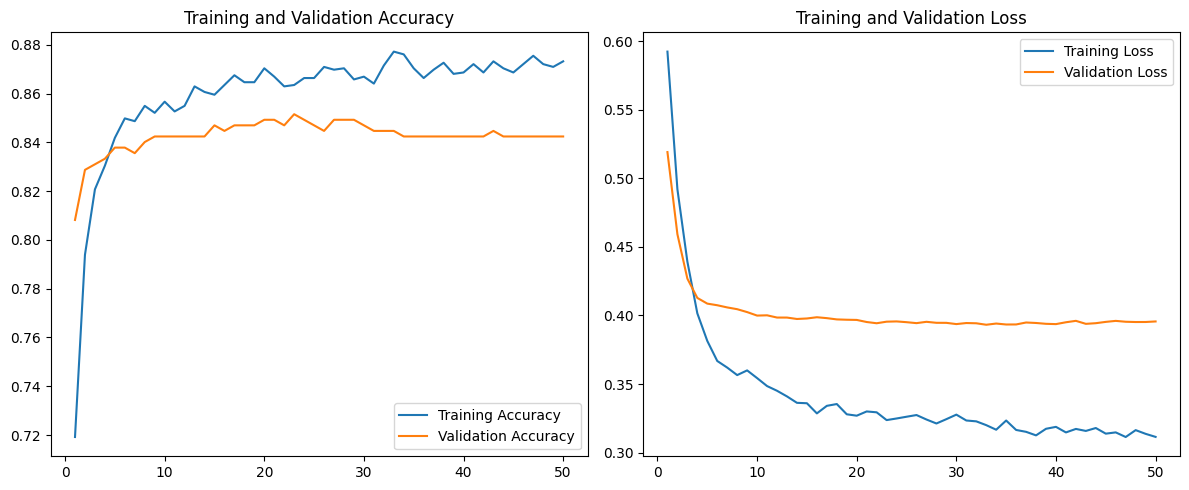

In [261]:
# Fit model
history = model_1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1  # Menampilkan log training setiap epoch
)

# Plotting accuracy dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Subplot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Subplot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

#Evaluation

##Confusion Matrix

In [262]:
def evaluate_and_plot_confusion_matrix(model, x_test, y_test_encoded, model_name, title, history, x_train, y_train_encoded):
    # Evaluasi model
    loss, accuracy = model.evaluate(x_test, y_test_encoded)
    print(f"\n{model_name} Testing loss:", loss)
    print(f"{model_name} Testing accuracy:", accuracy)

    # Prediksi probabilitas dan ubah ke kelas biner
    y_pred = model.predict(x_test)

    # Konversi ke NumPy array untuk keamanan
    y_test_encoded = np.array(y_test_encoded)

    y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
    y_true_classes = y_test_encoded.reshape(-1)

    # Akurasi
    acc = accuracy_score(y_true_classes, y_pred_classes)
    print(f"\n{model_name} Accuracy Score:", acc)
    print("\n")

    # Confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

    # Classification Report
    print(classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1'], zero_division=0))

    # Training info
    print(f"\n{model_name} Training Data Size: {len(x_train)}")
    print(f"{model_name} Training loss: {history.history['loss'][-1]}")
    print(f"{model_name} Training accuracy: {history.history['accuracy'][-1]}")
    print(f"{model_name} Validation loss: {history.history['val_loss'][-1]}")
    print(f"{model_name} Validation accuracy: {history.history['val_accuracy'][-1]}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.4462e-04 

model_1 Testing loss: 0.00017381348880007863
model_1 Testing accuracy: 1.0
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

model_1 Accuracy Score: 1.0




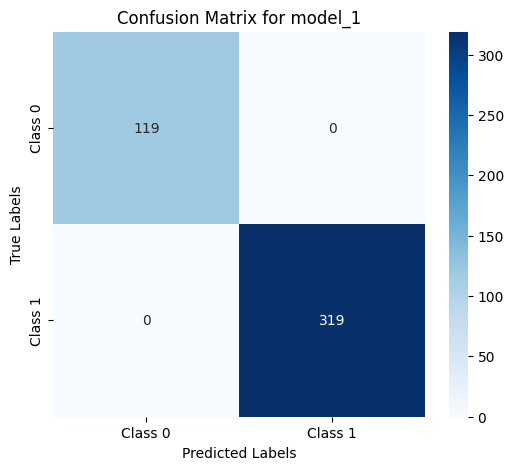

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       119
     Class 1       1.00      1.00      1.00       319

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438


model_1 Training Data Size: 1752
model_1 Training loss: 0.0015747920842841268
model_1 Training accuracy: 1.0
model_1 Validation loss: 0.00017381348880007863
model_1 Validation accuracy: 1.0


In [205]:
evaluate_and_plot_confusion_matrix(model_1, X_test, y_test, 'model_1', 'Confusion Matrix for model_1', history, X_train, y_train)

#Save Model

In [263]:
model_1.save('model.h5')